In [1]:
import numpy as np
from scipy.sparse import dia_matrix, csc_matrix
import time
import matplotlib.pyplot as plt

In [2]:
def new_Dmat(n,k):
    """
        Optimized difference matrix computation using scipy sparse matrices 
        
        Parameters
        ----------
        n : int
        k: int
        
        Returns
        -------
        D : Array
    """
    tic=time.time()
    def pascals(k):
        pas=[0,1,0]
        counter=k
        while counter>0:
            pas.insert(0,0)
            pas=[np.sum(pas[i:i+2]) for i in range (0,len(pas))]
            counter-=1    
        return pas
            
            
    coeff=pascals(k)
    coeff=[i for i in coeff if i!=0]
    coeff=[coeff[i] if i%2==0 else -coeff[i] for i in range(0,len(coeff))]
    
    if k == 0:
        D=dia_matrix((np.ones(n),0),shape=(n-2,n))
    elif k == 1:
        D=dia_matrix((np.vstack([i*np.ones(n) for i in coeff]),range(0,k+1)),shape=(n-2,n))
    else:
        D=dia_matrix((np.vstack([i*np.ones(n) for i in coeff]),range(0,k+1)),shape=(n-2,n))
    toc=time.time()
    return D,(toc-tic)

In [3]:
def Dmat(n,k):
    """
        function reform a matrix for assets with order
        
        Parameters
        ----------
        n : int
        k: int
        
        Returns
        -------
        D : Array
    """
    if k == 0:
        D = np.eye(n)
    elif k == 1:
        D = np.eye(n-1,n)
        for i in range(n-1):
            D[i, i+1] = -1
    else:
        D = Dmat(n,1)
        for i in range(k-1):
            Dn = Dmat(n-i-1, 1)
            D = np.dot(Dn, D)
    return D

### Comparisons

In [8]:
Dmat(10,4)


array([[ 1., -4.,  6., -4.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  6., -4.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  6., -4.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  6., -4.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -4.,  6., -4.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -4.,  6., -4.,  1.]])

In [9]:
new=new_Dmat(10,4)[0].toarray()
new

array([[ 1., -4.,  6., -4.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  6., -4.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  6., -4.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  6., -4.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -4.,  6., -4.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -4.,  6., -4.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -4.,  6., -4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -4.,  6.]])

### Performance Tests

In [79]:
dim=[10,100,500,1000,2500]

results={}
results[0]=[]
results[1]=[]
for i in dim:
    new_D,new_time=new_Dmat(i,2)
    
    tic=time.time()
    old_D=Dmat(i,2)
    toc=time.time()
    old_time=toc-tic
    

    if not results[0]: 
        results[0]=[old_time]
    else:
        results[0].append(old_time)
    if not results[1]: 
        results[1]=[new_time]
    else:
        results[1].append(new_time)

    

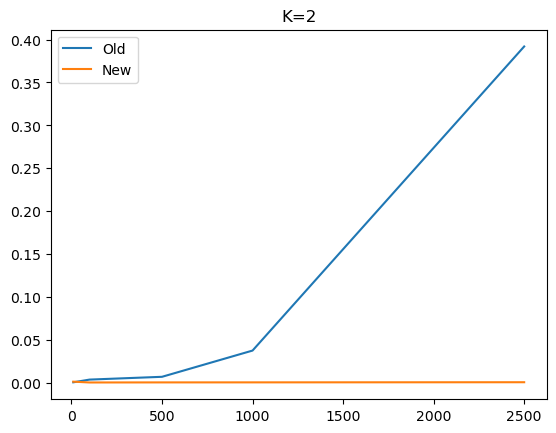

In [80]:
plt.title("K=2")
plt.plot(dim,results[0],label='Old')
plt.plot(dim,results[1],label='New')
plt.legend()



In [81]:
dim=[10,100,500,1000,2500]

results={}
results[0]=[]
results[1]=[]
for i in dim:
    new_D,new_time=new_Dmat(i,3)
    
    tic=time.time()
    old_D=Dmat(i,3)
    toc=time.time()
    old_time=toc-tic
    

    if not results[0]: 
        results[0]=[old_time]
    else:
        results[0].append(old_time)
    if not results[1]: 
        results[1]=[new_time]
    else:
        results[1].append(new_time)


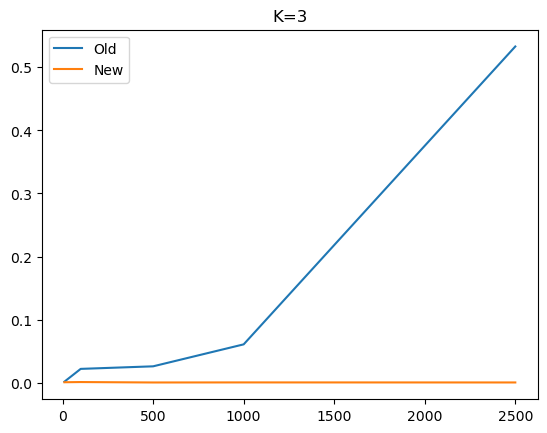

In [82]:
plt.title("K=3")
plt.plot(dim,results[0],label='Old')
plt.plot(dim,results[1],label='New')
plt.legend()

In [83]:
results

{0: [0.0016438961029052734,
  0.02194070816040039,
  0.025998353958129883,
  0.06081080436706543,
  0.5329716205596924],
 1: [0.0007753372192382812,
  0.0010728836059570312,
  0.00039577484130859375,
  0.000492095947265625,
  0.00042319297790527344]}